In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import os

from data.dataset_fitzpatrick17k import SCINDataset

In [2]:
scin_dataset = SCINDataset(root="SCIN_v2", path="images")

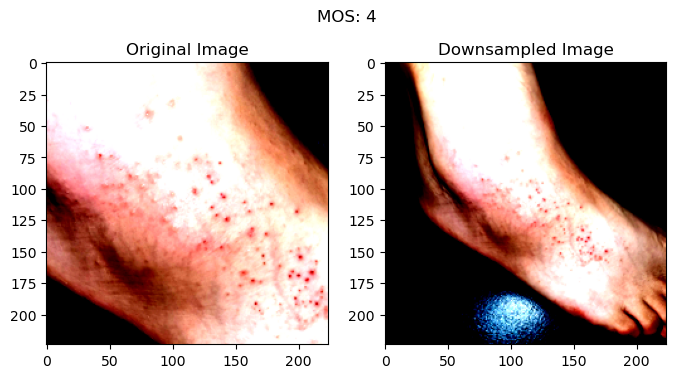

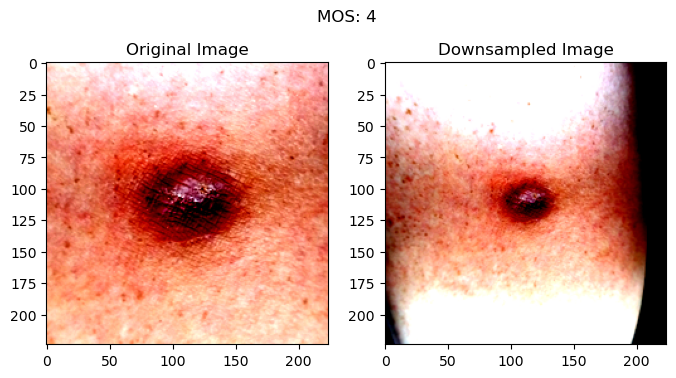

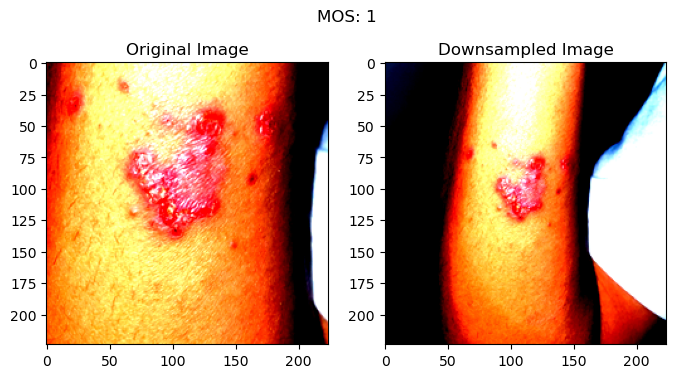

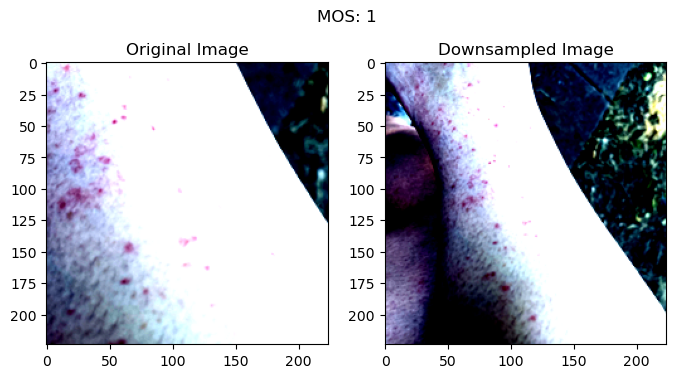

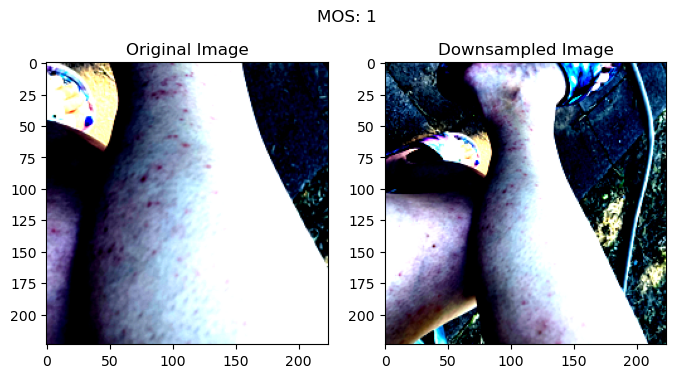

In [3]:
# Load and Visualize SCIN Dataset Samples
num_samples = 5
for i in range(num_samples):
    plt.figure(figsize=(8,4))  # Adjust figsize to accommodate both images
    sample = scin_dataset[i]
    img = torch.clip(sample['img'][0], min=0, max=1)  # Assuming you want to visualize only the first crop
    img_ds = torch.clip(sample['img_ds'][0], min=0, max=1)  # Assuming you want to visualize only the first crop
    mos = sample['mos']
    
    plt.subplot(1, 2, 1)
    plt.imshow(img.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C) for visualization
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(img_ds.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C) for visualization
    plt.title("Downsampled Image")

    plt.suptitle(f"MOS: {mos}")
    plt.show()

# Train/Val/Test split and save arrays of indices

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

num_splits = 10

train_percentage = 0.7
val_percentage = 0.1
test_percentage = 0.2

train_indices = []
val_indices = []
test_indices = []

In [5]:
for _ in range(num_splits):
    # Split the dataset into train and remaining sets
    train_idxs, remaining_indices = train_test_split(np.arange(len(scin_dataset)), train_size=train_percentage, random_state=None, shuffle=True)
    
    # Split the remaining set into val and test sets
    val_idxs, test_idxs = train_test_split(remaining_indices, test_size=test_percentage / (1 - train_percentage), random_state=None, shuffle=True)
    
    train_indices.append(train_idxs)
    val_indices.append(val_idxs)
    test_indices.append(test_idxs)

train_indices = np.array(train_indices)
val_indices = np.array(val_indices)
test_indices = np.array(test_indices)

In [6]:
train_indices.shape, val_indices.shape, test_indices.shape

((10, 4552), (10, 650), (10, 1301))

In [7]:
# Save the split indices
splits_folder = "SCIN_v2/splits"
if not os.path.exists(splits_folder):
    os.makedirs(splits_folder)
np.save('SCIN_v2/splits/train.npy', train_indices)
np.save('SCIN_v2/splits/val.npy', val_indices)
np.save('SCIN_v2/splits/test.npy', test_indices)